# Jupyter notebook studying example

This example is cited and cloned from Doctor Lampert"s Github example.
the purpose of this paper is tring to show an example of transform python code to Jupyter notebook. The code progress will extract NWIS data for HSPF by using nwisextractor progress and display the final results and the data resource address. 

Below python code is trying to import the required python progress such as OS library, datetime library, and pickle library. 

In [52]:
import os,datetime,pickle

This code string is trying to recall the nwisextractor progress, which stores in the preprocessing directory. The nwisextractor progress will download the daily discharge and water quality data source from setting gagestations in the entire USA.  

In [53]:
from pyhspf.preprocessing import NWISExtractor

Below code is using for display the interactive results of each code progress.

In [54]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Below code is the path of download files. The "#" is used to make comments in the code.

In [55]:
NWIS      = 'NWIS' # location for NWIS metadata files
directory = 'data' # working directory for input/output
HUC8      = '02060006' # 8-digit HUC

# extracted files
gagepath  = '{}/gagedata'.format(directory)

Indicating time series of the extracting data resourses.

In [56]:
start = datetime.datetime(1980, 1, 1)  # start date for timeseries
end   = datetime.datetime(2010, 1, 1)  # end date for timeseries

Indicating the location metadata file and gage stations in the HUC8.

In [57]:
nwisextractor = NWISExtractor(NWIS)

nwisextractor.extract_HUC8(HUC8, directory)

if not os.path.isdir(gagepath):
    nwisextractor.download_all(start, end, output = gagepath)
gageid    = '01594670'
gagedata  = 'hunting_station'
nwisextractor.download_gagedata(gageid, start, end, output = gagedata)

print('fetching flow data from the Patuxent watershed')

# make a list of all the data files just downloaded
datafiles = [f for f in os.listdir(gagepath) if f[-3:] != 'png']

NWIS directory NWIS exists

NWIS source metadata file NWIS/USGS_Streamgages-NHD_Locations_Shape.zip is present

gage metadata NWIS/USGS_Streamgages-NHD_Locations is present

gage station file data/gagestations exists

gage data for 01594670 exist

fetching flow data from the Patuxent watershed


The data of setting 2001 priod time for each gage. 

In [58]:

print ('Data for downloaded stations:')
s = datetime.datetime(2001, 1, 1)
e = datetime.datetime(2002, 1, 1)

for n in datafiles:

    p = '{}/{}'.format(gagepath, n)
    with open(p, 'rb') as f: station = pickle.load(f)
    
    # the following are attributes of the station directly from the database
    print('Gage ID:                     ', station.gageid)
    print('Name:                        ', station.name)
    print('State:                       ', station.state)
    print('First day of measurement:    ', station.day1)
    print('Last day of measurement:     ', station.dayn)
    print('Drainage area (square miles):', station.drain)
    print('Average flow (cfs):          ', station.ave)
    print('NWIS url:                    ', station.web)
        
    try: 

        ts = station.make_timeseries(start = s, end = e)   
        
        its = s.year, s.month, s.day, ts[0]
        print('flow on {:04d}-{:02d}-{:02d} (cfs):     {}'.format(*its))
        
        ave = sum(ts) / (e - s).days
        print('mean flow across dates (cfs): {:.1f}'.format(ave))
        
           
        
    except: pass 
    
    
    print('')

    try:

        TSS = station.waterquality['00530']
        print('Number of suspended solids measurements:', len(TSS))
        print('TSS concentration on {}: {} mg/L'.format(*TSS[0]))

    except: 

        print('no TSS data available for this station')
        
        
    print('')   

Data for downloaded stations:
Gage ID:                      01591000
Name:                         PATUXENT RIVER NEAR UNITY, MD
State:                        MD
First day of measurement:     19440720
Last day of measurement:      20030930
Drainage area (square miles): 34.8
Average flow (cfs):           39.284
NWIS url:                     http://waterdata.usgs.gov/nwis/nwisman/?site_no=01591000
flow on 2001-01-01 (cfs):     15.0
mean flow across dates (cfs): 27.8

Number of suspended solids measurements: 530
TSS concentration on 1985-09-04 10:15:00: 2.0 mg/L

Gage ID:                      01591350
Name:                         CATTAIL CREEK NEAR COOKSVILLE, MD
State:                        MD
First day of measurement:     19770420
Last day of measurement:      19810930
Drainage area (square miles): 8.37
Average flow (cfs):           10.99
NWIS url:                     http://waterdata.usgs.gov/nwis/nwisman/?site_no=01591350
warning, requested dates exceed available data, filling with 

 above is the results of daily discharge and water quality on each extracted gagestations in the entire USA.

change check

## simple plot below

we are going to plot:    
$y=\frac{1}{\sin_{i}(\pi^{2} x)}sin(\pi x)$
Latex equation
$\int_{a}^{b} x^2 dx$

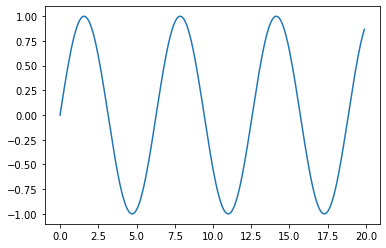

In [8]:
from matplotlib import pyplot as plt
import numpy as np

x=np.arange(0,20,0.1)
y=np.sin(x)
f=plt.plot(x,y)
